## DL_Assignment_5
1. Why would you want to use the Data API?
2. What are the benefits of splitting a large dataset into multiple files?
3. During training, how can you tell that your input pipeline is the bottleneck? What can you do to fix it?
4. Can you save any binary data to a TFRecord file, or only serialized protocol buffers?
5. Why would you go through the hassle of converting all your data to the Example protobuf format? Why not use your own protobuf definition?
6. When using TFRecords, when would you want to activate compression? Why not do it systematically?
7. Data can be preprocessed directly when writing the data files, or within the tf.data pipeline, or in preprocessing layers within your model, or using TF Transform. Can you list a few pros and cons of each option?

### Ans 1

The TensorFlow Data API, represented by `tf.data`, is a powerful tool for efficiently managing and processing data when building machine learning models. Here's why you would want to use the Data API:

1. **Efficient Data Loading:** The Data API provides efficient data loading pipelines that can seamlessly handle large datasets stored on disk or in memory, optimizing data input throughput.

2. **Data Augmentation:** It enables easy integration of data augmentation techniques for image and sequence data, helping improve model generalization and performance.

3. **Parallelism:** The API allows parallel data loading and preprocessing, utilizing multi-core CPUs and accelerators like GPUs to accelerate data preparation.

4. **Memory Management:** It efficiently manages memory consumption, preventing out-of-memory errors by loading data on-the-fly and releasing it when no longer needed.

5. **Performance Optimization:** It integrates seamlessly with TensorFlow's graph-based execution, making it easier to optimize data preprocessing as part of the computational graph.

6. **Customization:** The Data API provides flexibility to define custom data transformation and preprocessing functions, tailoring data pipelines to specific project needs.

7. **Compatibility:** It is compatible with various data formats, including CSV, TFRecord, and NumPy arrays, making it versatile for different data sources.

8. **Batching and Shuffling:** The API simplifies tasks like data batching, shuffling, and prefetching, optimizing training efficiency.

9. **Reproducibility:** By setting a random seed, you can ensure reproducible data pipelines, critical for research and experimentation.

Overall, the TensorFlow Data API streamlines the data handling process, making it an essential tool for building scalable, efficient, and well-performing machine learning models.

### Ans 2

Splitting a large dataset into multiple files offers several benefits, particularly when working with large-scale machine learning tasks or data processing pipelines:

1. **Efficient Storage:** Large datasets can be efficiently distributed across multiple files, making it easier to manage and store them on various storage mediums, including hard drives, distributed file systems, or cloud storage.

2. **Parallel Processing:** Splitting data into multiple files enables parallel processing, allowing multiple processes, threads, or nodes to work on different portions of the dataset simultaneously. This leads to significant speed improvements, especially in distributed computing environments.

3. **Scalability:** As your dataset grows, you can add new files to accommodate the additional data, providing a scalable solution that doesn't require restructuring the entire dataset.

4. **Reduced Memory Footprint:** Loading smaller files into memory reduces the memory footprint, making it possible to work with larger datasets without running into memory limitations.

5. **Fault Tolerance:** Smaller files provide better fault tolerance. If one file becomes corrupted or inaccessible, it affects only a portion of the dataset, minimizing data loss or interruption of processing.

6. **Data Partitioning:** Splitting data into files based on certain criteria (e.g., date, category, label) allows for efficient data partitioning and retrieval, which is useful for tasks like data analysis or querying subsets of the data.

7. **Compression and Archiving:** Individual files can be compressed or archived separately, which can save storage space and simplify data backup and transfer operations.

8. **Data Versioning:** Managing data versions and changes becomes more manageable when dealing with multiple smaller files, especially in collaborative or evolving projects.

In summary, splitting a large dataset into multiple files promotes efficiency, scalability, parallelism, and fault tolerance, making it easier to work with and manage large volumes of data in various machine learning and data processing scenarios.

### Ans 3

If your input pipeline is the bottleneck during training, you will typically observe certain signs and performance indicators:

1. **Low GPU Utilization:** Your GPU(s) are not fully utilized, and the training process spends significant time waiting for data.

2. **Long Epoch Times:** Each training epoch takes longer to complete than expected, and training becomes slower as you increase the batch size.

3. **CPU Utilization:** CPU utilization is low, indicating that data loading and preprocessing are not keeping the CPU busy.

4. **Data Loading Time:** The time spent on data loading and augmentation becomes a significant portion of the total training time.

To address input pipeline bottlenecks, you can take the following steps:

1. **Parallel Data Loading:** Use the TensorFlow Data API (`tf.data`) to parallelize data loading and preprocessing, optimizing CPU and I/O usage.

2. **Prefetching:** Implement data prefetching to overlap data loading with model training, reducing idle time for the CPU and GPU.

3. **Optimize Data Augmentation:** Ensure that data augmentation techniques are efficiently implemented and parallelized to minimize delays.

4. **Increase Batch Size:** Increasing the batch size can help amortize the data loading overhead and maximize GPU utilization.

5. **Use Distributed Data Loading:** In distributed training setups, distribute data loading across multiple workers to further improve parallelism.

6. **Profile and Monitor:** Use profiling tools like TensorFlow Profiler to identify specific bottlenecks and monitor resource utilization.

By addressing these issues and optimizing your input pipeline, you can improve training efficiency and make better use of available computational resources.

### Ans 4

In TensorFlow, TFRecord files are typically used to store serialized protocol buffer (protobuf) data. Protocol buffers are a language-agnostic, efficient data serialization format, and TFRecord files leverage this format for efficient storage and retrieval of structured data.

While it's possible to save binary data directly to a TFRecord file by treating it as a byte string, this approach is not recommended for several reasons:

1. **Loss of Structure:** Storing binary data as raw bytes in a TFRecord file may result in a loss of data structure and metadata, making it challenging to interpret or deserialize the data correctly.

2. **Efficiency:** TFRecord files are optimized for handling structured data, and storing binary data as byte strings may not leverage the full benefits of TFRecord's efficiency and compression capabilities.

3. **Compatibility:** Using protobuf serialization ensures compatibility with TensorFlow's data processing pipelines and allows for seamless integration with other TensorFlow components.

To store binary data in TFRecord files effectively, it's advisable to encode the binary data as protobuf messages within the TFRecord, preserving data structure and metadata.

### Ans 5

Using the Example protobuf format, which is a specific structure used for TFRecord files in TensorFlow, offers several advantages:

1. **Interoperability:** The Example format is a well-defined and standardized structure within TensorFlow, ensuring interoperability and compatibility across TensorFlow versions and tools.

2. **Ecosystem Integration:** Many TensorFlow data processing tools, libraries, and functions are designed to work seamlessly with the Example format, making it easier to integrate your data into TensorFlow workflows.

3. **Data Consistency:** Standardizing data representation using Example ensures consistency in data structure and encoding, reducing the chances of data-related errors.

4. **Efficient Storage:** Example-encoded data can be efficiently compressed and stored, reducing storage requirements and improving I/O performance during data loading.

5. **Simplicity:** Using the Example format simplifies data serialization and deserialization, as TensorFlow provides built-in functions for encoding and decoding data in this format.

While creating our custom protobuf definition is possible and offers flexibility, it may introduce complexity and potential compatibility issues, particularly if you need to interact with various TensorFlow components and tools. The Example format is a convenient choice for storing data within the TensorFlow ecosystem.

This code creates a TFRecord file named "data.tfrecord" from sample image data. It uses TensorFlow to read image files, decode them as JPEG images (assuming RGB format), and then re-encode them as JPEG or PNG. The code defines a function, `create_example`, that constructs a TFRecord example containing the image data as bytes and a label as an integer. It iterates through a list of image filenames and labels, serializes the examples, and writes them to the TFRecord file using `TFRecordWriter`. This process is commonly used to prepare data for efficient storage and retrieval in machine learning pipelines.

Then We load a TFRecord file ("data.tfrecord"), parses its contents to extract images and labels, decodes and displays the images using Matplotlib, and prints their corresponding labels. It visualizes data stored in TFRecord format.

In [1]:
import tensorflow as tf
from tensorflow.train import Example, Features, Feature, BytesList, Int64List

# Sample data (image filenames and labels)
data = [("1.jpg", 0), ("2.png", 1), ("3.png", 0)]

# Define a function to create an Example from data
def create_example(image_filename, label):
    image_data = tf.io.read_file(image_filename)
    image_data = tf.image.decode_jpeg(image_data, channels=3)  # Assuming RGB images
    image_data = tf.image.encode_jpeg(image_data)  # Re-encode the image as JPEG
    feature = {
        "image": Feature(bytes_list=BytesList(value=[image_data.numpy()])),
        "label": Feature(int64_list=Int64List(value=[label])),
    }
    return Example(features=Features(feature=feature))

# Define the TFRecord file path
tfrecord_file = "data.tfrecord"

# Create and write the TFRecord file
with tf.io.TFRecordWriter(tfrecord_file) as writer:
    for image_filename, label in data:
        example = create_example(image_filename, label)
        writer.write(example.SerializeToString())

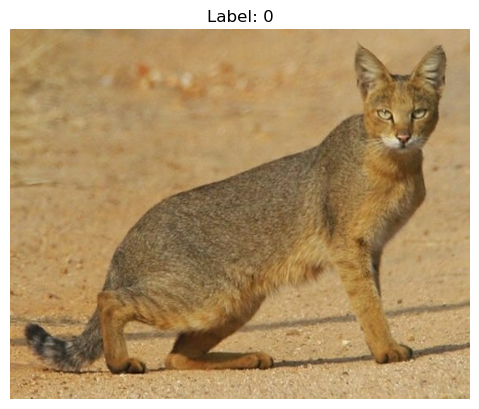

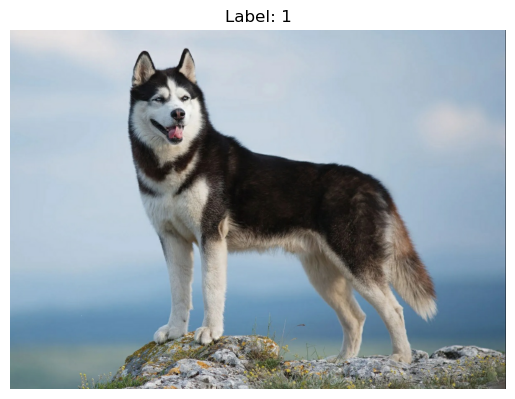

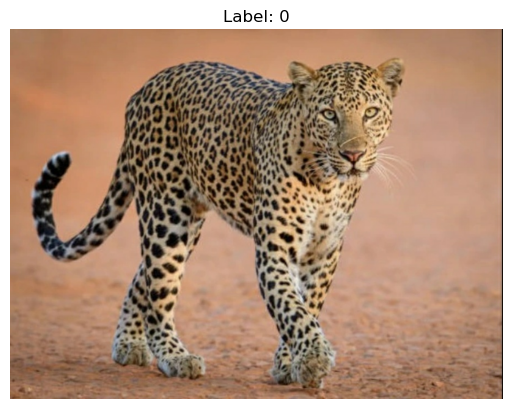

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the TFRecord file path
tfrecord_file = "data.tfrecord"

# Function to parse a single TFRecord example
def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, feature_description)
    return example["image"], example["label"]

# Create a dataset from the TFRecord file
dataset = tf.data.TFRecordDataset(tfrecord_file)

# Parse the dataset
parsed_dataset = dataset.map(parse_tfrecord_fn)

# Iterate through and print the contents
for image, label in parsed_dataset:
    # Decode the image
    decoded_image = tf.image.decode_jpeg(image, channels=3)  # Assuming RGB images

    # Display the image
    plt.figure()
    plt.imshow(decoded_image.numpy())
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

### Ans 6

Activating compression in TFRecords can be beneficial when we have large datasets or limited storage resources. However, there are trade-offs to consider:

1. **Storage Efficiency:** Compression reduces the size of TFRecord files, making them more storage-efficient. This is especially important when dealing with massive datasets where disk space is a concern.

2. **I/O Performance:** Smaller file sizes result in faster I/O operations during data loading. This can significantly speed up training and inference, especially when working with remote or slow storage systems.

3. **Bandwidth Savings:** Compression reduces the amount of data transferred over networks, which is crucial for distributed training scenarios.

However, compression comes with computational overhead during data reading and writing. It may not be necessary for smaller datasets or when ample storage and bandwidth are available. Therefore, it's not always activated systematically to avoid unnecessary CPU overhead when working with modest-sized datasets or high-performance storage systems. Compression is best utilized in situations where storage, I/O, or bandwidth constraints are a concern.

### Ans 7

Certainly! Here are some pros and cons of different approaches to data preprocessing:

1. **Preprocessing During Data File Creation (e.g., TFRecord creation):**
   - *Pros:*
     - Data is preprocessed once and stored in a processed format, reducing runtime overhead.
     - Faster data loading during training since preprocessing is done in advance.
   - *Cons:*
     - Preprocessing is not flexible and may not accommodate changes in preprocessing requirements.

2. **Preprocessing Within `tf.data` Pipeline:**
   - *Pros:*
     - Offers flexibility to change preprocessing logic without altering data files.
     - Data can be preprocessed on-the-fly, saving storage space.
   - *Cons:*
     - Adds runtime overhead during data loading, potentially slowing down training.

3. **Preprocessing Within Preprocessing Layers of the Model:**
   - *Pros:*
     - Integration with the model allows preprocessing as part of the training process.
     - Easier to distribute preprocessing logic with model code.
   - *Cons:*
     - Can increase model complexity and make it harder to inspect intermediate data transformations.
     - May not be suitable for complex preprocessing tasks.

4. **Using TF Transform:**
   - *Pros:*
     - Offers a separate preprocessing pipeline that can be reused across different models.
     - Provides powerful preprocessing capabilities and compatibility with Apache Beam for distributed processing.
   - *Cons:*
     - Requires additional setup and dependencies.
     - Overhead for setting up and maintaining TF Transform.

The choice of preprocessing method depends on factors such as dataset size, flexibility requirements, computational resources, and deployment constraints. In practice, a combination of these methods is often used to strike a balance between preprocessing efficiency, flexibility, and maintainability.